In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
X = digits['data']
y = digits['target']

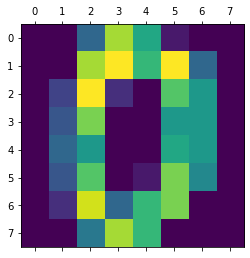

In [5]:
plt.matshow(digits.images[0]) 

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
tree = DecisionTreeClassifier()

In [9]:
from tqdm.cli import tqdm

In [10]:
scores_sampling = [cross_val_score(tree,X,y, cv=10).mean() for _ in tqdm(list(range(1_000)))]

100%|██████████| 1000/1000 [02:13<00:00,  7.48it/s]


In [11]:
scores = np.mean(scores_sampling)
scores

0.8268766697703289

In [12]:
np.std(scores_sampling)

0.004705879346276397

In [13]:
def write_answer(filename, s):
    with open(filename, "w") as fout:
        fout.write(str(s))

In [20]:
write_answer('trees_1.txt', scores)

In [16]:
from sklearn.ensemble import BaggingClassifier

In [18]:
cv_scores = cross_val_score(BaggingClassifier(n_estimators=100),X,y, cv=10)

In [19]:
cv_scores.mean()

0.925397268777157

In [21]:
write_answer('trees_2.txt', cv_scores.mean())

In [22]:
X.shape

(1797, 64)

In [24]:
np.sqrt(64)

8.0

In [25]:
cv_scores = cross_val_score(BaggingClassifier(n_estimators=100, max_features=8),X,y, cv=10)

In [26]:
cv_scores.mean()

0.9332184978274365

In [27]:
write_answer('trees_3.txt', cv_scores.mean())

In [29]:
tree = DecisionTreeClassifier(max_features=8)
bagging_cls = BaggingClassifier(base_estimator=tree, n_estimators=100)

In [30]:
cv_scores = cross_val_score(bagging_cls,X,y, cv=10)

In [31]:
cv_scores.mean()

0.9488019863438858

In [32]:
write_answer('trees_4.txt', cv_scores.mean())

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100),X,y, cv=10)
cv_scores.mean()

0.9448944754810675

In [41]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=1000),X,y, cv=10)
cv_scores.mean()

0.9487957790192427

In [42]:
write_answer('trees_5.txt', "2 3 4 7")